In [ ]:
## Q1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function definitions
def f1(x):
    return x * np.sin(6 * np.pi * x) * np.exp(-x ** 2)

def f2(x):
    return np.exp(-x ** 2) * np.arctan(x) * np.sin(4 * np.pi * x)

# Generate input/output data for each function
def generate_data(func, num_samples, x_min, x_max):
    X = np.random.uniform(x_min, x_max, size=(num_samples, 1))
    y = func(X)
    return X, y

# Split data into training and testing sets
def split_data(X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    return X_train, X_test, y_train, y_test

# Train MLP and calculate errors
def train_test_MLP(X_train, X_test, y_train, y_test, hidden_nodes):
    mlp = MLPRegressor(hidden_layer_sizes=(hidden_nodes,), activation='logistic', solver='adam', random_state=0)
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    return train_error, test_error

# a) Behavior of training and testing errors for fixed number of hidden nodes and varying training samples
def varying_training_samples(func, x_min, x_max, hidden_nodes):
    sample_sizes = range(20, 201, 10)
    train_errors = []
    test_errors = []
    for num_samples in sample_sizes:
        X, y = generate_data(func, num_samples, x_min, x_max)
        X_train, X_test, y_train, y_test = split_data(X, y)
        train_error, test_error = train_test_MLP(X_train, X_test, y_train, y_test, hidden_nodes)
        train_errors.append(train_error)
        test_errors.append(test_error)
    return sample_sizes, train_errors, test_errors

# b) Effect of number of hidden nodes on training and testing errors for fixed number of training samples
def varying_hidden_nodes(func, x_min, x_max, num_samples):
    hidden_nodes = [2, 4, 6, 8, 10, 12]
    train_errors = []
    test_errors = []
    for nodes in hidden_nodes:
        X, y = generate_data(func, num_samples, x_min, x_max)
        X_train, X_test, y_train, y_test = split_data(X, y)
        train_error, test_error = train_test_MLP(X_train, X_test, y_train, y_test, nodes)
        train_errors.append(train_error)
        test_errors.append(test_error)
    return hidden_nodes, train_errors, test_errors

# Plotting function
def plot_errors(fn,x_values, train_errors, test_errors, xlabel, ylabel):
    plt.plot(x_values, train_errors, label='Training Error')
    plt.plot(x_values, test_errors, label='Testing Error')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(fn+' : Training and Testing Errors')
    plt.show()

# Main function
def main():
    # Function 1: f(x) = x * sin(6πx) * exp(-x^2), x belongs to [-1, 1]
    X1, y1 = generate_data(f1, 1000, -1, 1)
    X1_train, X1_test, y1_train, y1_test = split_data(X1, y1)

    # a) Behavior of training and testing errors for fixed number of hidden nodes and varying training samples
    sample_sizes, train_errors_1a, test_errors_1a = varying_training_samples(f1, -1, 1, 3)

    train_error_f1 = np.mean(train_errors_1a)
    test_error_f1 = np.mean(test_errors_1a)

    print("Function f1:")
    print(f"Average Training Error: {train_error_f1}")
    print(f"Average Testing Error: {test_error_f1}")

    plot_errors('F1 ',sample_sizes, train_errors_1a, test_errors_1a, 'Number of Samples', 'Mean Squared Error')

    # # b) Effect of number of hidden nodes on training and testing errors for fixed number of training samples
    hidden_nodes, train_errors_1b, test_errors_1b = varying_hidden_nodes(f1, -1, 1, 100)
    plot_errors('F1 ',hidden_nodes, train_errors_1b, test_errors_1b, 'Number of Hidden Nodes', 'Mean Squared Error')

    # Function 2: f(x) = exp(-x^2) * arctan(x) * sin(4πx), x belongs to [-2, 2]
    X2, y2 = generate_data(f2, 1000, -2, 2)
    X2_train, X2_test, y2_train, y2_test = split_data(X2, y2)

    # a) Behavior of training and testing errors for fixed number of hidden nodes and varying training samples
    sample_sizes, train_errors_2a, test_errors_2a = varying_training_samples(f2, -2, 2, 3)

    print("\nFunction f2:")
    train_error_f2 = np.mean(train_errors_2a)
    test_error_f2 = np.mean(test_errors_2a)
    print(f"Average Training Error: {train_error_f2}")
    print(f"Average Testing Error: {test_error_f2}")

    plot_errors('F2 ',sample_sizes, train_errors_2a, test_errors_2a, 'Number of Samples', 'Mean Squared Error')

    # # b) Effect of number of hidden nodes on training and testing errors for fixed number of training samples
    hidden_nodes, train_errors_2b, test_errors_2b = varying_hidden_nodes(f2, -2, 2, 100)
    plot_errors('F2 ',hidden_nodes, train_errors_2b, test_errors_2b, 'Number of Hidden Nodes', 'Mean Squared Error')

if __name__ == "__main__":
    main()


In [1]:
## Q2

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step a: Data Preparation
np.random.seed(0)  # For reproducibility

# Generate random input-output data
X = np.random.uniform(-1, 1, size=(500, 2))
y = np.sin(2 * np.pi * X[:, 0]) * np.cos(0.5 * np.pi * X[:, 1]) * np.exp(-X[:, 0] ** 2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step b: MLP Training and Testing
def train_test_MLP(hidden_neurons):
    # Set up MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(hidden_neurons,), activation='relu', solver='adam', random_state=0)

    # Train the MLP
    mlp.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Calculate training and testing errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error

# Fix the number of hidden neurons to 4
hidden_neurons = 4
train_error_4, test_error_4 = train_test_MLP(hidden_neurons)
print(f"Number of Hidden Neurons: {hidden_neurons}")
print(f"Training Error: {train_error_4}")
print(f"Testing Error: {test_error_4}")

# Step c: Varying the Number of Hidden Neurons
hidden_neurons_list = [2, 6, 8, 12, 20]
for hidden_neurons in hidden_neurons_list:
    train_error, test_error = train_test_MLP(hidden_neurons)
    print(f"\nNumber of Hidden Neurons: {hidden_neurons}")
    print(f"Training Error: {train_error}")
    print(f"Testing Error: {test_error}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Hidden Neurons: 4
Training Error: 0.21313586032990292
Testing Error: 0.20652458432118695


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Number of Hidden Neurons: 2
Training Error: 0.750504064982758
Testing Error: 0.7052462145404955

Number of Hidden Neurons: 6
Training Error: 0.1443184979853438
Testing Error: 0.14338755723913763

Number of Hidden Neurons: 8
Training Error: 0.14484408450349065
Testing Error: 0.1446002535056355

Number of Hidden Neurons: 12
Training Error: 0.14265219966135975
Testing Error: 0.141049246600223

Number of Hidden Neurons: 20
Training Error: 0.12450823465128573
Testing Error: 0.12763195176429684


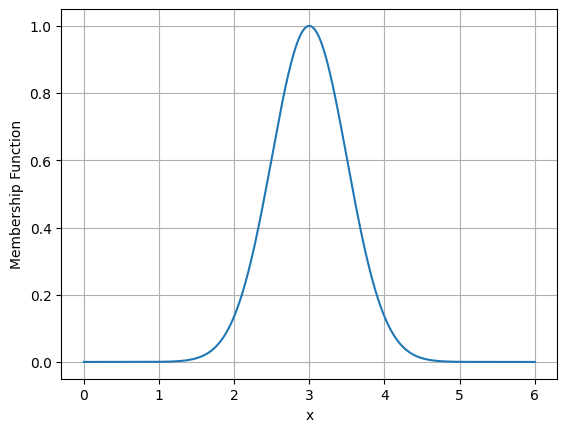

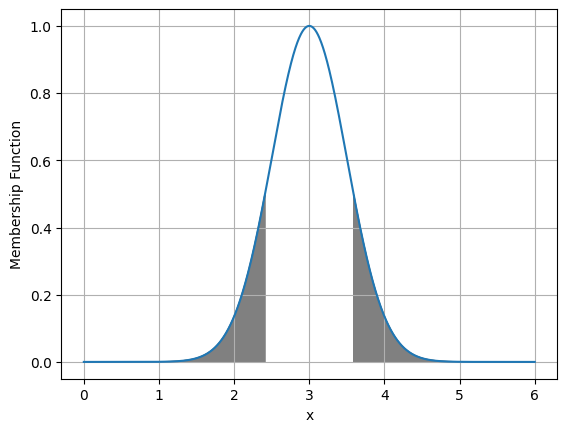

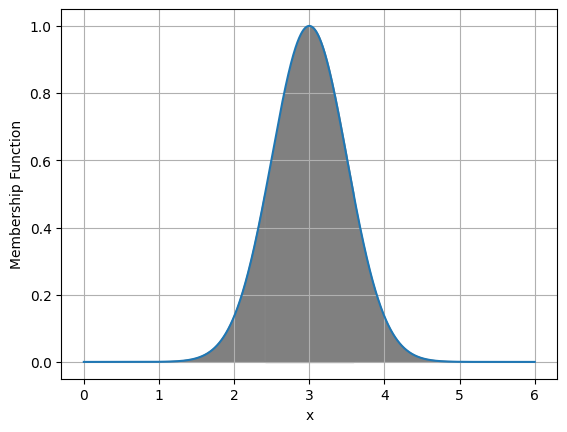

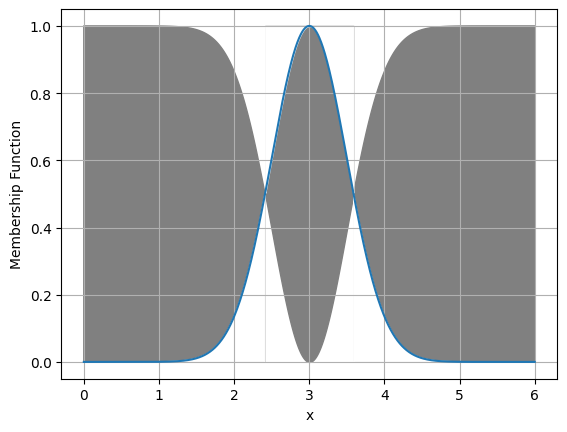

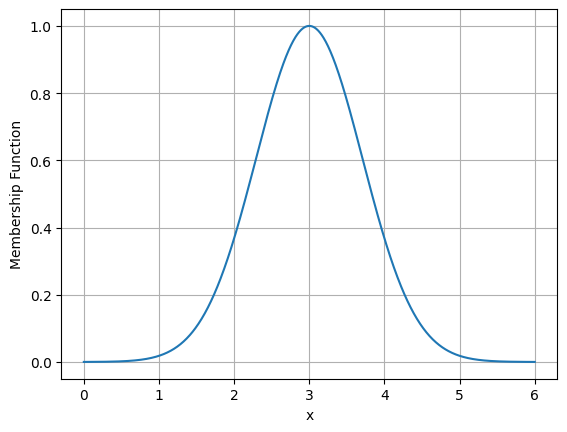

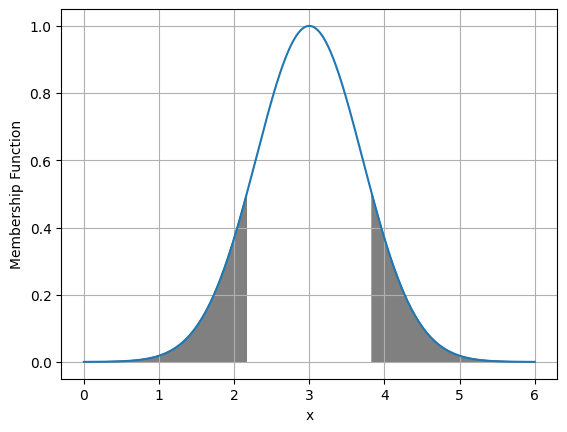

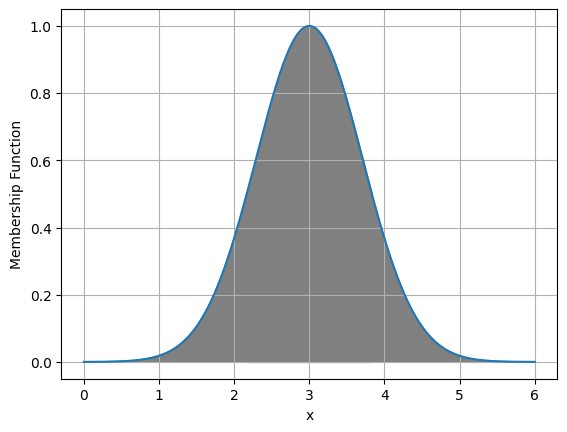

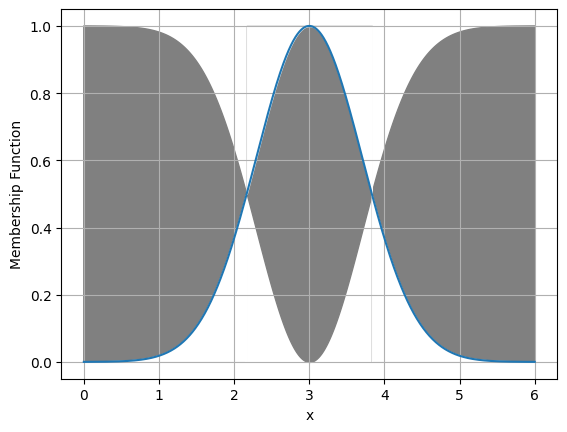

In [2]:
## Q4 f1 and f2
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
  return np.exp(-2 * (x - 3)**2)

def f2(x):
  return np.exp(-1 * (x - 3)**2)

x = np.linspace (0, 6, 1000)
y = f1(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,y, where=(y<=0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<=0.5), color='gray', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,y, where=(y>=0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<0.5), color='gray', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,1-y,1, where=(y>=0.5), color='gray', alpha=1)
plt.fill_between(x,1-y, where=(y<0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<0.5), color='white', alpha=1)
plt.fill_between(x,y,1, where=(y>=0.5), color='white', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

x = np.linspace (0, 6, 1000)
y = f2(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,y, where=(y<=0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<=0.5), color='gray', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,y, where=(y>=0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<0.5), color='gray', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

plt.fill_between(x,1-y,1, where=(y>=0.5), color='gray', alpha=1)
plt.fill_between(x,1-y, where=(y<0.5), color='gray', alpha=1)
plt.fill_between(x,y, where=(y<0.5), color='white', alpha=1)
plt.fill_between(x,y,1, where=(y>=0.5), color='white', alpha=1)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Membership Function')
plt.grid(True)
plt.show()

